In [1098]:
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

% matplotlib inline

## Comparing population data

* Compare data sets for one country with high population for 1980-2014 (no missing data in all evaluated data sets): Brazil **<span style="color:gray; background:lime;">DONE</span>**

Summary: The data sets align very closely, visibly showing same growth rate over the years 1980-2014. PWT has the highest population values, and IMF the lowest. PWT > WB > UN > IMF in population values for most of values

* Compare total population for available years




* Compare large well-defined countries form a mix of regions & development statuses (e.g. USA, UK, China, Indonesia, India, Japan, Tanzania)
* Calculate average population value for each country, then filter by countries with population over 1/2 mil (avg)
* Compare structure of data sets (growth rate vs levels). 
* Look at treatment of China.
Try summing up Taiwan, HK, Macau + China to see if value aligns with another data set that has all those included as China

* MISC information
Most populous countries

1. China	1,379,302,771	  6. Pakistan	204,924,861
2. India	1,281,935,911	  7. Nigeria	190,632,261
3. United States	326,625,791	  8. Bangladesh	157,826,578
4. Indonesia	260,580,739	  9. Russia	142,257,519
5. Brazil	207,353,391	  10. Japan	126,451,398

ISO:
1. China CHN
2. USA
3. Indonesia IDN
4. Brazil BRA
5. Russian Federation RUS
Bangladesh BGD
Nigeria NGA
Japan JPN
Pakistan PAK


----------
Side Note- Least populated 

San Marino SMR
Palau PLW
United Arab Emirates
Singapore?
Norway NOR
Luxembourg LUX

In [1099]:
highest_populated = ['CHN', 'IND', 'USA', 'BRA', 'PAL', 'RUS', ]
top3_populated = ['CHN', 'IND', 'USA']

## Convenience function

In [1100]:
def add_iso_column(_df, _country_name_col):
    # uses iso_map (global dict)
    _df['iso'] = _df[_country_name_col].apply(lambda name: iso_map[name] if iso_map.get(name) else name)
    return _df

def set_iso_as_index(_df, _iso_col_name):
    return _df.set_index(_iso_col_name)

# country specific
def get_row_by_country_name(_df, country_name):
    # Get country by name
    return _df[_df['country_name'] == country_name]

## Open data

In [1101]:
os.listdir('munged_data')

['API_SP.POP.TOTL_DS2_en_csv_v2_total.csv',
 'imf_pop_total.csv',
 'imf_pop_total.xls',
 'pwt9_pivoted_total.csv',
 'pwt9_pop_total.csv',
 'wb_pop_total.csv']

In [1102]:
dir_path = os.environ['ZERG']

pwt = dir_path + 'data/PWT/pwt9_pivoted.csv'
un = dir_path + 'data/UN/un_population_iso_pivoted.csv' 
imf = dir_path + 'data/munged_data/imf_pop_total.csv' # added total pop data via excel. same as included World data
wb = dir_path + 'data/WB/wb_population_1215.csv'

In [1103]:
pop_pwt = pd.read_csv(pwt)
pop_un = pd.read_csv(un)
pop_wb = pd.read_csv(wb)
pop_imf = pd.read_csv(imf)

In [1104]:
del pop_imf['Unnamed: 0']

In [1105]:
rhg_regions = dir_path + 'data/iso_based_on_rhg_regions.csv'

WARNING: THIS IS SLOW (heavy excel with macros, etc.) - don't re-run
#### or have a separate file just for iso

In [1106]:
# open ISO data (RHG_regions)
# this is SLOW
iso = pd.read_csv(rhg_regions)

In [1107]:
iso.columns

Index(['country_name_imf', 'ENGLISH SHORT NAME', 'ALPHA-2', 'ALPHA-3',
       'NUMERIC'],
      dtype='object')

In [1108]:
iso_map_pre = iso[['country_name_imf', 'ALPHA-3']].set_index('country_name_imf')

In [1109]:
iso_map = iso_map_pre.to_dict()['ALPHA-3']
iso_map_rev = {y:x for x,y in iso_map.items()}

In [1110]:
#iso_map_rev # map from iso to country nape
#iso_map # map from country name to ISO

In [1111]:
pwt_countries=pop_pwt['countrycode']
un_countries=pop_un['ISO3']
# wb_countries=pop_wb['Country Code']

In [1112]:
iso_map.get('moon')
iso_map.get('United States of America')

### MAP country name to country code

In [1113]:
pop_imf['country_code'] = pop_imf['country_name'].apply(lambda name: iso_map[name] if iso_map.get(name) else name)

In [1114]:
# imf data doesn't provide country code so needs manual mapping
imf_countries = pop_imf['country_code']

In [1115]:
[print(country) for country in pop_imf['country_code'].tolist() if len(country) > 3]

Congo, Republic of 
Kosovo
Syria
World
Total


[None, None, None, None, None]

In [1116]:
pwt_set = set(pwt_countries)
un_set = set(un_countries)
wb_set = set(wb_countries)
imf_set = set(imf_countries)

In [1117]:
ls = {
    'pwt': pwt_set,
    'un': un_set,
    'wb': wb_set,
    'imf': imf_set
}

for k,v in ls.items():
    print ('{} has {} countries'.format(k,len(v)))

# pwt compare

pwt has 183 countries
un has 233 countries
wb has 217 countries
imf has 194 countries


In [1118]:
countries_in_un_not_wb = ls['un'] - ls['wb']
sorted([iso_map_rev[c] for c in countries_in_un_not_wb])

['Anguilla',
 'Bonaire, Sint Eustatius and Saba',
 'Cook Islands',
 'Falkland Islands (Malvinas)',
 'French Guiana',
 'Guadeloupe',
 'Holy See',
 'Martinique',
 'Mayotte',
 'Montserrat',
 'Niue',
 'Réunion',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Pierre and Miquelon',
 'Taiwan Province of China',
 'Tokelau',
 'Wallis and Futuna',
 'Western Sahara']

# countries in imf but not in pwt

In [1119]:
countries_in_imf_not_pwt = ls['imf'] - ls['pwt']
     
sorted([iso_map_rev.get(c) for c in countries_in_imf_not_pwt if iso_map_rev.get(c)])

['Afghanistan',
 'Eritrea',
 'Guyana',
 'Kiribati',
 'Libya',
 'Marshall Islands',
 'Micronesia, Fed. States of',
 'Nauru',
 'Palau',
 'Papua New Guinea',
 'Puerto Rico',
 'Samoa',
 'San Marino',
 'Solomon Islands',
 'South Sudan, Republic of',
 'Timor-Leste',
 'Tonga',
 'Tuvalu',
 'Vanuatu']

## Convenience functions

### Function to retrieve missing # years per country for a given list of countries
```
Given a list of countries

Retrieve # of missing years for each country

Optional: *specify a dataset
Optional: replace Country Name with Country code to be more reusable
```

In [1120]:
def get_missing_years(_list_of_countries):
    '''
    Parmeters
    ----
    [Python List] _list_of_countries
        list of countries (each country is a Country name as a String)
        
    Returns
    ----
    [Python List]
        a list of tuple pairs containing (country_name, #_missing_years)
    where country_name (String) and # missing_years (int)
    sorted by decreasing # of missing years
    '''
    missing_years = []
    
    return []

### Mungdata data

1) rename indexes to be consistent across data set

2) set iso column as the index

#### Rename cols

In [1121]:
# rename column names
del pop_wb['Unnamed: 0']

# IMF
pop_imf = add_iso_column(pop_imf, 'country_name')

# PWT
pop_pwt.rename(index=str, columns={'countrycode': 'iso', 'country': 'country_name'}, inplace=True)

# WB
pop_wb.rename(index=str, columns={"Country Code": "iso", "Country Name": "country_name"}, inplace=True)

# UN
del pop_un['Unnamed: 0']
pop_un.rename(index=str, columns={'ISO3': 'iso', 'Location': 'country_name'}, inplace=True)

#### Set ISO as Index

In [1122]:
df_imf = set_iso_as_index(pop_imf, 'iso')
df_pwt = set_iso_as_index(pop_pwt, 'iso')
df_wb = set_iso_as_index(pop_wb, 'iso')
df_un = set_iso_as_index(pop_un, 'iso')

## Get max population data from each data set

In [1123]:
# also in convience_functions
def get_max_countries(_df, _n, _yr):
    '''
    Returns n largest country data values from the given year
    
    _df: pd.DataFrame
        data frame containing population of gdp data for all countries

    _n: int
        # of largest values to retrieve
        
    _yr: int
        given year
    '''
    return _df.nlargest(_n, _yr)

### Get Brazil/BRA data

In [1124]:
pwt_bra = df_pwt.loc['BRA'][31:] * 10**6 # 1980 to 2014, 35 years
assert cpwt.shape == cwb.shape == cimf.shape == cun.shape

In [1125]:
wb_bra = df_wb.loc['BRA'][21:56] # seems like absolute value to me
un_bra = df_un.loc['BRA'][31:66] * 10 **3

In [1126]:
un_bra.get_values()[1]

124030908.0

In [1127]:
imf_bra = df_imf.loc['BRA'][1:36] * 10**6


In [1128]:
# # print(cwb.idxmax(), cwb.idxmin())
# print(cimf.idxmax(), cimf.idxmin())
# print(cpwt.idxmax(), cpwt.idxmin())
# print(cun.idxmax(), cun.idxmin())

In [1129]:
type(un_bra.index) == pd.core.indexes.numeric.Float64Index

False

In [1130]:
for _df in [pwt_bra, wb_bra, un_bra, imf_bra]:
    if type(_df.index) != pd.core.indexes.numeric.Float64Index:
        _df.index = _df.index.map(float)
        
for _df in [pwt_bra, wb_bra, un_bra, imf_bra]:
    print (type(_df.index))

<class 'pandas.core.indexes.numeric.Float64Index'>
<class 'pandas.core.indexes.numeric.Float64Index'>
<class 'pandas.core.indexes.numeric.Float64Index'>
<class 'pandas.core.indexes.numeric.Float64Index'>


In [1131]:
(un_bra-wb_bra).get_values()

array([0.0, 0.0, 0.0, 0.0, 1.4901161193847656e-08, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 2.9802322387695312e-08, 0.0, 2.9802322387695312e-08, 0.0,
       -2.9802322387695312e-08, 0.0, 0.0, 2.9802322387695312e-08, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

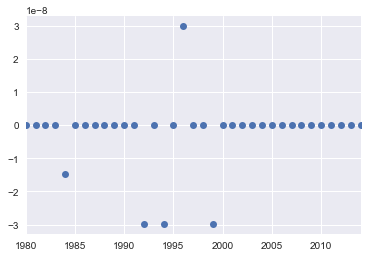

In [1132]:
# Plot difference 
wb_un_diff = wb_bra-un_bra
wb_un_diff.plot(style='o')

In [1133]:
df1 = pd.DataFrame({'pwt': pwt_bra, 
                   'wb': wb_bra, 
                   'un': un_bra,
                   'imf': imf_bra})

#pd.concat([cpwt, cwb, cun, cimf], axis=1)

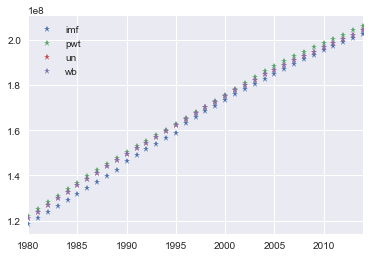

In [1134]:
# pwt9.set_index(['countrycode', 'year']).unstack('year')['rgdpe_pc'].loc[['IND', 'IDN', 'BRA', 'CHN']].T.plot(style='*')
df1.plot(style='*')


In [1135]:
df1.isnull().sum()
# no nan values!

imf    0
pwt    0
un     0
wb     0
dtype: int64

## Compare total population

### Get only years 1980-2014

In [1136]:
cols_of_interest = ['country_name']
years = [str(y) for y in range(1980, 2015)]
cols_of_interest.extend(years)

In [1137]:
ds = [df_pwt, df_wb, df_un, df_imf]

In [1138]:
## Convert imf years from int to str (to be consistent with other datasets)
df_imf.columns = map(str, df_imf.columns)
df_imf.columns

Index(['country_name', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'country_code'],
      dtype='object')

In [1139]:
for dd in ds:
    print(dd[cols_of_interest].shape)

(183, 36)
(217, 36)
(233, 36)
(194, 36)


In [1140]:
df_pwt

,country_name,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
iso,,,,,,,,,,,,,,,,,,,,,
ALB,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.082172,3.050741,3.010849,2.968026,2.929886,2.901883,2.886010,2.880667,2.883281,2.889676
DZA,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.267887,33.749328,34.261971,34.811059,35.401790,36.036159,36.717132,37.439427,38.186135,38.934334
AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.912942,18.541467,19.183907,19.842251,20.520103,21.219954,21.942296,22.685632,23.448202,24.227524
AIA,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012637,0.012903,0.013145,0.013365,0.013571,0.013768,0.013956,0.014133,0.014300,0.014460
ATG,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082565,0.083467,0.084397,0.085350,0.086300,0.087233,0.088152,0.089069,0.089985,0.090900
ARG,Argentina,17.158029,17.525200,17.884976,18.238994,18.588894,18.936311,19.280156,19.619336,19.955487,...,39.145491,39.558750,39.969903,40.381860,40.798641,41.222875,41.655616,42.095224,42.538304,42.980026
ARM,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.014917,3.002161,2.988117,2.975029,2.966108,2.963496,2.967984,2.978339,2.992192,3.006154
ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100031,0.100830,0.101218,0.101342,0.101416,0.101597,0.101936,0.102393,0.102921,0.103441
AUS,Australia,8.427065,8.675029,8.859130,9.029064,9.239138,9.456325,9.684162,9.900220,10.106834,...,20.274282,20.606228,20.975949,21.370348,21.770690,22.162863,22.542371,22.911375,23.270465,23.622353


In [1141]:
df_pwt.iloc[:182,:]

,country_name,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
iso,,,,,,,,,,,,,,,,,,,,,
ALB,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.082172,3.050741,3.010849,2.968026,2.929886,2.901883,2.886010,2.880667,2.883281,2.889676
DZA,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.267887,33.749328,34.261971,34.811059,35.401790,36.036159,36.717132,37.439427,38.186135,38.934334
AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.912942,18.541467,19.183907,19.842251,20.520103,21.219954,21.942296,22.685632,23.448202,24.227524
AIA,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012637,0.012903,0.013145,0.013365,0.013571,0.013768,0.013956,0.014133,0.014300,0.014460
ATG,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082565,0.083467,0.084397,0.085350,0.086300,0.087233,0.088152,0.089069,0.089985,0.090900
ARG,Argentina,17.158029,17.525200,17.884976,18.238994,18.588894,18.936311,19.280156,19.619336,19.955487,...,39.145491,39.558750,39.969903,40.381860,40.798641,41.222875,41.655616,42.095224,42.538304,42.980026
ARM,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.014917,3.002161,2.988117,2.975029,2.966108,2.963496,2.967984,2.978339,2.992192,3.006154
ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100031,0.100830,0.101218,0.101342,0.101416,0.101597,0.101936,0.102393,0.102921,0.103441
AUS,Australia,8.427065,8.675029,8.859130,9.029064,9.239138,9.456325,9.684162,9.900220,10.106834,...,20.274282,20.606228,20.975949,21.370348,21.770690,22.162863,22.542371,22.911375,23.270465,23.622353


In [1142]:
total_pwt_pop_row = df_pwt.iloc[:182, 31:].sum(axis=0, numeric_only=True)

In [1143]:
# Calculate total values for PWT, UN and Wb. IMF has them
# Check these match with sum calculated via Excel

# this method didn't work for me
#df_pwt.append({'Total3': total_pwt_pop_row}, ignore_index=True)

# df_imf.append(df_imf.sum(skipna=True, numeric_only=True), ignore_index=True)
# # source https://stackoverflow.com/questions/21752399/pandas-dataframe-total-row

In [1144]:
df_pwt.loc['Total_pd'] = df_pwt.iloc[:182, 1:].sum()
#df_pwt

# total calculated via pd vs excel is same..

In [1145]:
# country specific
def get_row_by_country_name(_df, country_name):
    # Get country by name
    return _df[_df['country_name'] == country_name]

In [1146]:
# get only columns of interest
cols_for_total = [str(y) for y in range(1980, 2015)]

In [1147]:
# PWT total

In [1148]:
pwt_total = get_row_by_country_name(df_pwt, 'Total')[cols_for_total].reset_index()

#pwt_sub.insert(0, 'source', 'pwt')
del pwt_total['iso']
pwt_total

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,4067.792483,4143.257371,4220.377104,4299.388723,4380.569063,4464.010935,4549.851998,4637.781818,4726.781921,4826.84662,...,6423.692232,6502.565145,6582.438253,6663.083371,6744.362187,6826.078342,6907.928139,6990.183842,7072.456671,7154.701081


In [1149]:
# WB Total
df_wb
df_wb.loc['Total'] = df_wb.iloc[:, 1:].sum()
wb_total = df_wb[cols_for_total].loc['Total']
wb_total.to_dict()

{'1980': 4412687234.0,
 '1981': 4490389883.0,
 '1982': 4571076858.0,
 '1983': 4652462765.0,
 '1984': 4733621360.0,
 '1985': 4816428709.0,
 '1986': 4901929843.0,
 '1987': 4989677185.0,
 '1988': 5078341787.0,
 '1989': 5167144780.0,
 '1990': 5264644548.0,
 '1991': 5351624249.0,
 '1992': 5435434249.0,
 '1993': 5520176501.0,
 '1994': 5603814414.0,
 '1995': 5688489338.0,
 '1996': 5771127347.0,
 '1997': 5853764158.0,
 '1998': 5935401460.0,
 '1999': 6016057278.0,
 '2000': 6095890763.0,
 '2001': 6175296997.0,
 '2002': 6254361245.8828726,
 '2003': 6333696910.8989267,
 '2004': 6413700161.9913721,
 '2005': 6494291045.2439661,
 '2006': 6575597802.4849863,
 '2007': 6657505602.9909286,
 '2008': 6740747977.2955341,
 '2009': 6824136049.1102009,
 '2010': 6907518699.3622274,
 '2011': 6989663635.3578157,
 '2012': 7069577688.0772333,
 '2013': 7154865116.6100826,
 '2014': 7240848130.7391624}

In [1150]:
#IMF total
imf_total = get_row_by_country_name(df_imf, 'Total').reset_index()[cols_for_total]
imf_total

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,3996.821,4069.095,4144.355,4218.711,4292.474,4368.624,4447.162,4527.179,4605.502,4835.87,...,6406.832,6486.862,6569.934,6649.709,6729.132,6808.318,6868.647,6953.668,7034.943,7116.69


In [1151]:
df_wb.loc['Total'] = df_wb.iloc[:, 1:].sum()
wb_total = df_wb[cols_for_total].loc['Total']
wb_total.to_dict()

{'1980': 8825374468.0,
 '1981': 8980779766.0,
 '1982': 9142153716.0,
 '1983': 9304925530.0,
 '1984': 9467242720.0,
 '1985': 9632857418.0,
 '1986': 9803859686.0,
 '1987': 9979354370.0,
 '1988': 10156683574.0,
 '1989': 10334289560.0,
 '1990': 10529289096.0,
 '1991': 10703248498.0,
 '1992': 10870868498.0,
 '1993': 11040353002.0,
 '1994': 11207628828.0,
 '1995': 11376978676.0,
 '1996': 11542254694.0,
 '1997': 11707528316.0,
 '1998': 11870802920.0,
 '1999': 12032114556.0,
 '2000': 12191781526.0,
 '2001': 12350593994.0,
 '2002': 12508722491.765745,
 '2003': 12667393821.797853,
 '2004': 12827400323.982744,
 '2005': 12988582090.487932,
 '2006': 13151195604.969973,
 '2007': 13315011205.981857,
 '2008': 13481495954.591068,
 '2009': 13648272098.220402,
 '2010': 13815037398.724455,
 '2011': 13979327270.715631,
 '2012': 14139155376.154467,
 '2013': 14309730233.220165,
 '2014': 14481696261.478325}

In [1152]:
#UN total

un_total =df_un[cols_of_interest].iloc[:, 1:].sum()
un_total.to_dict() # pd.Series

{'1980': 4458411.5340000037,
 '1981': 4537845.7769999998,
 '1982': 4618776.1680000005,
 '1983': 4701530.8429999994,
 '1984': 4786483.8619999988,
 '1985': 4873781.7960000029,
 '1986': 4963633.2279999992,
 '1987': 5055636.1320000011,
 '1988': 5148556.956000003,
 '1989': 5240735.1169999996,
 '1990': 5330943.46,
 '1991': 5418758.8029999975,
 '1992': 5504401.1489999946,
 '1993': 5588094.8370000059,
 '1994': 5670319.7029999979,
 '1995': 5751474.4160000002,
 '1996': 5831565.0199999996,
 '1997': 5910566.294999999,
 '1998': 5988846.1029999964,
 '1999': 6066867.3910000017,
 '2000': 6145006.9890000001,
 '2001': 6223412.157999998,
 '2002': 6302149.6390000032,
 '2003': 6381408.9869999979,
 '2004': 6461370.865000003,
 '2005': 6542159.3830000032,
 '2006': 6623847.9130000016,
 '2007': 6706418.5930000022,
 '2008': 6789771.2530000033,
 '2009': 6873741.0540000014,
 '2010': 6958169.1589999981,
 '2011': 7043008.5860000011,
 '2012': 7128176.9350000015,
 '2013': 7213426.4520000014,
 '2014': 7298453.032999993

In [1153]:
# list of totals
# pwt_total
# imf_total
# un?
# wb_total

In [1159]:
imf_total = imf_total.loc[0] # convert to series

In [1168]:
df_pop_total = pd.DataFrame({
    'un': un_total* 10**3,
    'wb': wb_total,
    'imf': imf_total*10**6,
    'pwt': pwt_total.loc[0]*10**6
})

df_pop_total

,imf,pwt,un,wb
1980,3.996821e+09,4.067792e+09,4.458412e+09,8.825374e+09
1981,4.069095e+09,4.143257e+09,4.537846e+09,8.980780e+09
1982,4.144355e+09,4.220377e+09,4.618776e+09,9.142154e+09
1983,4.218711e+09,4.299389e+09,4.701531e+09,9.304926e+09
1984,4.292474e+09,4.380569e+09,4.786484e+09,9.467243e+09
1985,4.368624e+09,4.464011e+09,4.873782e+09,9.632857e+09
1986,4.447162e+09,4.549852e+09,4.963633e+09,9.803860e+09
1987,4.527179e+09,4.637782e+09,5.055636e+09,9.979354e+09
1988,4.605502e+09,4.726782e+09,5.148557e+09,1.015668e+10
1989,4.835870e+09,4.826847e+09,5.240735e+09,1.033429e+10


In [ ]:
ax = sns.tsplot(time="timepoint", value="BOLD signal",
                 unit="subject", condition="ROI",
                 data=gammas)